# Baseline results

This notebook generates the plots for the baseline (`ef_construction=ef_search=128, m={8,16}`). The data is obtained by running the modified [ANN-Benchmarks](https://github.com/binidxaba/ann-benchmarks).

The relevant csv files are:
- create.csv: The result of grepping the index build start/end tags and convert to unix timestamps
- results.csv: The file generated by the benchmark after executing the data_export.py script

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data directory

You can find the data files in the following directory in the repository. 

In [3]:
#directory = "csv_sift_128_euclidean_parallel_full_baseline_1702561796"
directory = "csv_sift_128_euclidean_parallel_full_baseline_1705095771"

In [4]:
img_dir="./tmp"

In [5]:
colors = ["#412e93", "#f9457a", "#da38ca"]
ef_construction = 128
ef_search = 128

## Build Time

I parsed the ann-benchmarks output looking for the Index Build start/end tags, then converted those to Unix timestamps.

In [6]:
build_time = pd.read_csv(directory + "/create.csv")
build_time = build_time.rename(columns={'extension': 'Extension'})
build_time['build_time'] = build_time["end"]-build_time["start"]
build_time

,Extension,m,start,end,build_time
0,Lantern,8,1705097274,1705097918,644
1,Lantern,16,1705098371,1705099391,1020
2,Pgvector,8,1705101860,1705102978,1118
3,Pgvector,16,1705099808,1705101556,1748


In [7]:
pv = build_time.pivot(index="m", columns="Extension", values="build_time")

Text(0.5, 1.0, 'Build Time (ef_construction=128)')

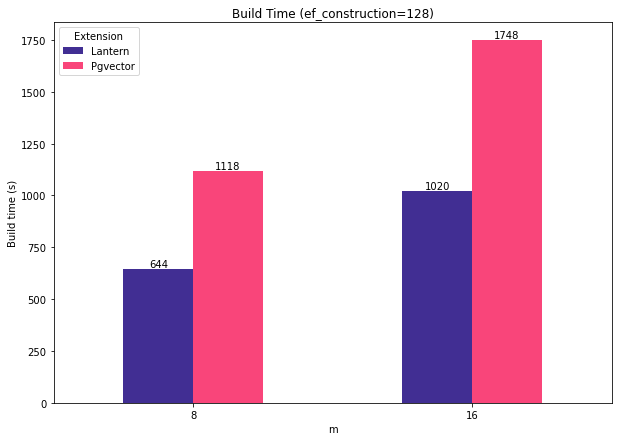

In [8]:
ax = pv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Build time (s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Build Time (ef_construction={ef_construction})")

In [9]:
ax.get_figure().savefig(f"{img_dir}/001-baseline-build-time.png")

In [10]:
pv["speed_up"] = 1 + (pv["Pgvector"] - pv["Lantern"]) / pv["Lantern"]
pv

Extension,Lantern,Pgvector,speed_up
m,,,
8,644,1118,1.736025
16,1020,1748,1.713725


## Massaging the results.csv file

I basically had to parse the `parameters` column to extract the construction/search parameters. With that, I could easily pivot the data frame for the different plots.

In [11]:
df_all_results = pd.read_csv(directory + "/results.csv")
df_all_results = df_all_results.rename(columns={'algorithm': 'Extension'})
df_all_results

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,p99,p999,distcomps,build,candidates,indexsize,queriessize,dataset
0,lantern,"Lantern(m=8, ef_construction=128, ef_search=128)",10,0.95256,0.98990,0.9994,0.089526,226.605667,4.557035,4.557035,4.557035,4.557035,0.0,858.669610,10.0,620704.0,2739.137147,sift-128-euclidean
1,lantern,"Lantern(m=16, ef_construction=128, ef_search=128)",10,0.98794,0.99898,1.0000,0.089385,145.558791,6.870076,6.870076,6.870076,6.870076,0.0,1236.958056,10.0,702840.0,4828.564409,sift-128-euclidean
2,pgvector,"PGVector(m=8, ef_construction=128, ef_search=128)",10,0.96797,0.99495,1.0000,0.089452,348.487013,2.920421,2.920421,2.920421,2.920421,0.0,1169.760185,10.0,716728.0,2056.684962,sift-128-euclidean
3,pgvector,"PGVector(m=16, ef_construction=128, ef_search=...",10,0.99330,0.99954,1.0000,0.089370,210.562715,4.842434,4.842434,4.842434,4.842434,0.0,1801.612820,10.0,800776.0,3803.028472,sift-128-euclidean


In [12]:
c = re.compile(".*m=(\d+)")
df_all_results['m'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_search=(\d+)")
df_all_results['ef_search'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_construction=(\d+)")
df_all_results['ef_construction'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=8, ef_construction=128, ef_search=128)",10,0.95256,0.98990,0.9994,0.089526,226.605667,4.557035,4.557035,...,4.557035,0.0,858.669610,10.0,620704.0,2739.137147,sift-128-euclidean,8,128,128
1,lantern,"Lantern(m=16, ef_construction=128, ef_search=128)",10,0.98794,0.99898,1.0000,0.089385,145.558791,6.870076,6.870076,...,6.870076,0.0,1236.958056,10.0,702840.0,4828.564409,sift-128-euclidean,16,128,128
2,pgvector,"PGVector(m=8, ef_construction=128, ef_search=128)",10,0.96797,0.99495,1.0000,0.089452,348.487013,2.920421,2.920421,...,2.920421,0.0,1169.760185,10.0,716728.0,2056.684962,sift-128-euclidean,8,128,128
3,pgvector,"PGVector(m=16, ef_construction=128, ef_search=...",10,0.99330,0.99954,1.0000,0.089370,210.562715,4.842434,4.842434,...,4.842434,0.0,1801.612820,10.0,800776.0,3803.028472,sift-128-euclidean,16,128,128


## Index Size

In [13]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="indexsize")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,620704.0,716728.0
16,702840.0,800776.0


Text(0.5, 1.0, 'Index Size (ef_construction=128)')

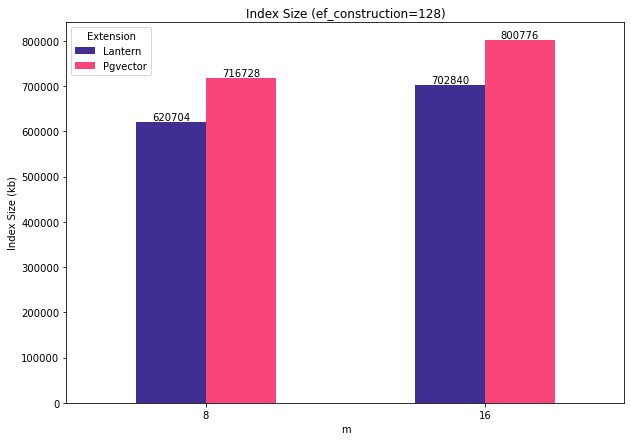

In [14]:
ax = results_piv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Index Size (kb)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Index Size (ef_construction={ef_construction})")

In [15]:
ax.get_figure().savefig(f"{img_dir}/002-baseline-index-size.png")

In [16]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
8,620704.0,716728.0,0.154702
16,702840.0,800776.0,0.139343


## Recall

In [17]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,0.95256,0.96797
16,0.98794,0.99330


Text(0.5, 1.0, 'Recall (ef_construction=128, ef_search=128)')

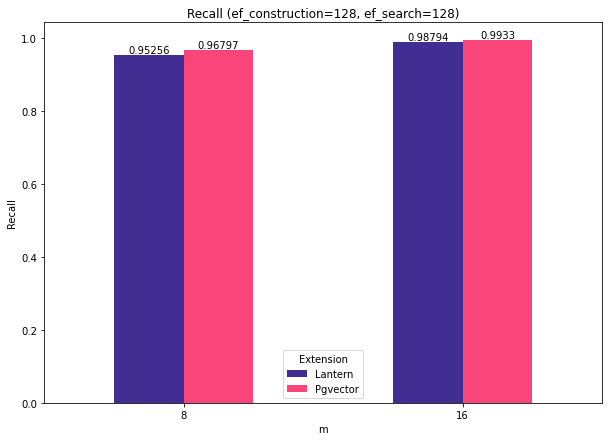

In [18]:
ax = results_piv.plot.bar(y = ["Lantern", "Pgvector"], color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Recall (ef_construction={ef_construction}, ef_search={ef_search})")

In [19]:
ax.get_figure().savefig(f"{img_dir}/003-baseline-recall.png")

## Throughput

In [20]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,226.605667,348.487013
16,145.558791,210.562715


In [21]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
8,226.605667,348.487013,0.537857
16,145.558791,210.562715,0.446582


Text(0.5, 1.0, 'QPS (ef_construction=128, ef_search=128))')

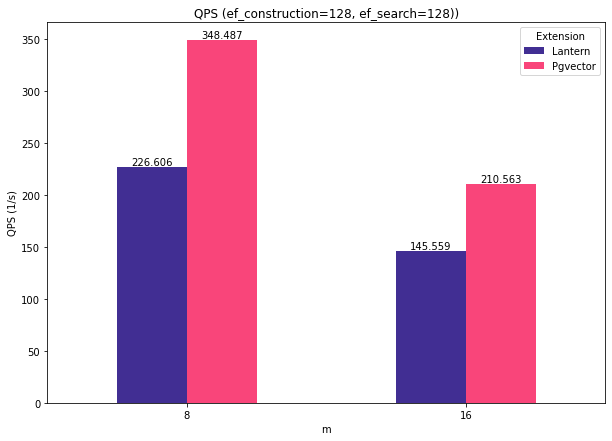

In [22]:
ax = results_piv.plot.bar(y = ["Lantern", "Pgvector"], color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"QPS (ef_construction={ef_construction}, ef_search={ef_search}))")

In [23]:
ax.get_figure().savefig(f"{img_dir}/004-baseline-qps.png")

## Latency (95th Percentile)

In [24]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="p95")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

In [25]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
8,4.557035,2.920421,-0.359140
16,6.870076,4.842434,-0.295141


Text(0.5, 1.0, 'Latency (95th percentile) (ef_construction=128, ef_search=128))')

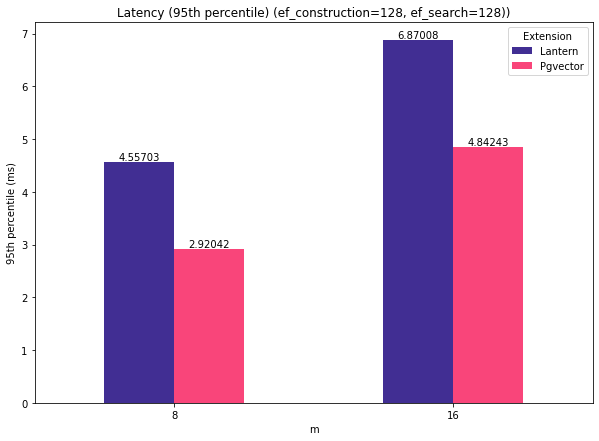

In [26]:
ax = results_piv.plot.bar(y = ["Lantern", "Pgvector"], color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("95th percentile (ms)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Latency (95th percentile) (ef_construction={ef_construction}, ef_search={ef_search}))")

In [27]:
ax.get_figure().savefig(f"{img_dir}/005-baseline-p95.png")